Symbolic Algebra with `sympy`
====

In [1]:
from sympy import *

In [2]:
from sympy import init_session
init_session()

IPython console for SymPy 0.7.6.1 (Python 3.5.1-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://www.sympy.org


Basics
----

In [3]:
from sympy.stats import *
E(Die('X', 6))

In [4]:
sqrt(8)

In [5]:
expr = x + 2*y

In [6]:
expr2 = x*expr

In [7]:
expr2

In [8]:
expand(expr2)

In [9]:
factor(expand(expr2))

In [10]:
diff(sin(x) * exp(x), x)

In [11]:
integrate(exp(x)*sin(x) + exp(x)*cos(x), x)

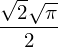

In [12]:
integrate(sin(x**2), (x, -oo, oo))

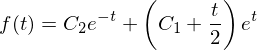

In [13]:
dsolve(Eq(f(t).diff(t, t) - f(t), exp(t)), f(t))

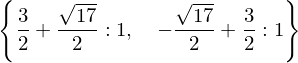

In [14]:
Matrix([[1,2],[2,2]]).eigenvals()

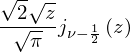

In [15]:
nu = symbols('nu')
besselj(nu, z).rewrite(jn)

In [16]:
latex(Integral(cos(x)**2, (x, 0, pi)))

'\\int_{0}^{\\pi} \\cos^{2}{\\left (x \\right )}\\, dx'

In [17]:
expr = cos(x) + 1

In [18]:
expr.subs(x, y)

In [19]:
expr = x**y
expr = expr.subs(y, x**y)
expr = expr.subs(y, x**y)
expr = expr.subs(x, x**x)

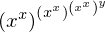

In [20]:
expr

In [21]:
expr = sin(2*x) + cos(2*x)
expand_trig(expr)

In [22]:
expr.subs(sin(2*x), 2*sin(x)*cos(x))

In [23]:
expr = x**4 - 4*x**3 + 4*x**2 - 2*x +3

In [24]:
replacements = [(x**i, y**i) for i in range(5) if i%2 == 0]
expr.subs(replacements)

In [25]:
sexpr = "x**4 - 4*x**3 + 4*x**2 - 2*x +3"
sympify(sexpr)

In [26]:
sqrt(8).evalf()

In [27]:
pi.evalf(100)

In [28]:
expr = cos(2*x)
expr.evalf(subs = {x: 2.4})

In [29]:
expr = cos(x)**2 + sin(x)**2
expr.evalf(subs = {x: 1}, chop=True)

In [30]:
a = range(10)
expr = sin(x)
f = lambdify(x, expr, "numpy")
f(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

Simplify
----

In [31]:
simplify(sin(x)**2 + cos(x)**2)

In [32]:
simplify(gamma(x) / gamma(x-2))

In [33]:
expand((x + y)**3)

In [34]:
factor(x**3 - x**2 + x - 1)

In [35]:
factor_list(x**3 - x**2 + x - 1)

In [36]:
expand((cos(x) + sin(x))**2)

In [37]:
expr = x*y + x - 3 + 2*x**2 - z*x**2 + x**3
cexpr = collect(expr, x)
cexpr

In [38]:
cexpr.coeff(x**2)

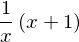

In [39]:
cancel((x**2 + 2*x + 1) / (x**2 + x))

In [40]:
expr = (x*y**2 - 2*x*y*z + x*z**2 + y**2 - 2*y*z + z**2)/(x**2 - 1)

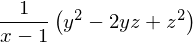

In [41]:
cancel(expr)

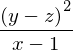

In [42]:
factor(expr)

In [43]:
expr = (4*x**3 + 21*x**2 + 10*x + 12)/(x**4 + 5*x**3 + 5*x**2 + 4*x)

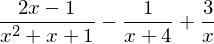

In [44]:
apart(expr)

In [45]:
trigsimp(sin(x)*tan(x)/sec(x))

In [46]:
trigsimp(cosh(x)**2 + sinh(x)**2)

In [47]:
expand_trig(sin(x + y))

In [48]:
x, y = symbols('x y', positive=True)
a, b = symbols('a b', real=True)
z, t, c = symbols('z t c')

In [49]:
powsimp(x**a*x**b)

In [50]:
powsimp(x**a*y**a)

In [51]:
powsimp(t**c*z**c)

In [52]:
powsimp(t**c*z**c, force=True)

In [53]:
expand_power_exp(x**(a + b))

In [54]:
expand_power_base((x*y)**a)

In [55]:
powdenest((x**a)**b)

In [56]:
n = symbols('n', real=True)

In [57]:
expand_log(log(x*y))

In [58]:
expand_log(log(x**n))

In [59]:
logcombine(n*log(x))

In [60]:
x, y, z = symbols('x y z')
k, m, n = symbols('k m n')

In [61]:
factorial(n)

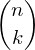

In [62]:
binomial(n, k)

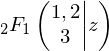

In [63]:
hyper([1,2], [3], z)

In [64]:
factorial(x).rewrite(gamma)

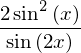

In [65]:
tan(x).rewrite(sin)

In [66]:
expand_func(gamma(x + 3))

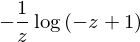

In [67]:
hyperexpand(hyper([1, 1], [2], z))

In [68]:
expr =  meijerg([[1],[1]], [[1],[]], -z)

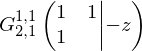

In [69]:
expr

In [70]:
hyperexpand(expr)

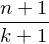

In [71]:
combsimp(binomial(n+1, k+1)/binomial(n, k))

In [72]:
def list_to_frac(l):
    expr = Integer(0)
    for i in reversed(l[1:]):
        expr += i
        expr = 1/expr
    return l[0] + expr

In [73]:
list_to_frac([1,2,3,4])

In [74]:
syms = symbols('a0:5')

In [75]:
syms

In [76]:
frac = list_to_frac(syms)

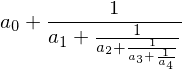

In [77]:
frac

In [78]:
frac = cancel(frac)

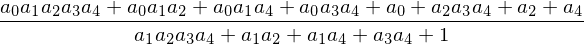

In [79]:
frac

In [80]:
from sympy.printing import print_ccode
print_ccode(frac)

(a0*a1*a2*a3*a4 + a0*a1*a2 + a0*a1*a4 + a0*a3*a4 + a0 + a2*a3*a4 + a2 + a4)/(a1*a2*a3*a4 + a1*a2 + a1*a4 + a3*a4 + 1)


Calculus
----

In [81]:
diff(cos(x), x)

In [82]:
diff(x**4, x, 3)

In [83]:
expr = exp(x*y*z)
diff(expr, x, y, 2, z, 4)

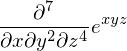

In [84]:
deriv = Derivative(expr, x, y, 2, z, 4)
deriv

In [85]:
deriv.doit()

In [86]:
integrate(cos(x), x)

In [87]:
integrate(exp(-x), (x, 0, oo))

In [88]:
integrate(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))

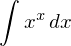

In [89]:
integrate(x**x, x)

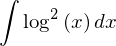

In [90]:
expr = Integral(log(x)**2, x)
expr

In [91]:
expr.doit()

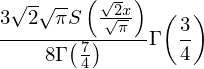

In [92]:
integrate(sin(x**2), x)

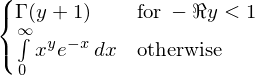

In [93]:
integrate(x**y*exp(-x), (x, 0, oo))

In [94]:
limit(sin(x)/x, x, 0)

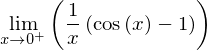

In [95]:
expr = Limit((cos(x) - 1)/x, x, 0)
expr

In [96]:
expr.doit()

In [97]:
limit(1/x, x, 0, '-')

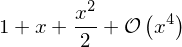

In [98]:
expr = exp(sin(x))
expr.series(x, 0, 4)

In [99]:
x + x**3 + x**6 + O(x**4)

In [100]:
x * O(1)

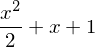

In [101]:
expr.series(x, 0, 4).removeO()

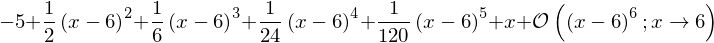

In [102]:
exp(x - 6).series(x, 6)

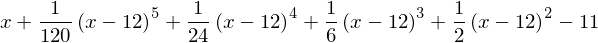

In [103]:
exp(x - 6).series(x, 6).removeO().subs(x, x - 6)

Working wiht matrices
----

In [104]:
M = Matrix([[1,2,3],[3,2,1]])
P = Matrix([0,1,1])
M*P

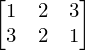

In [105]:
M

In [106]:
M.shape

In [107]:
M.col(-1)

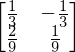

In [108]:
M = Matrix([[1,3], [-2,3]])
M**-1

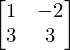

In [109]:
M.T

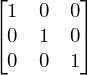

In [110]:
eye(3)

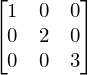

In [111]:
diag(1,2,3)

In [112]:
M.det()

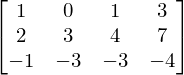

In [113]:
M= Matrix([[1,0,1,3],[2,3,4,7],[-1,-3,-3,-4]])
M

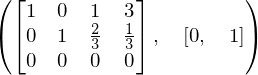

In [114]:
M.rref()

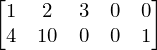

In [115]:
M = Matrix([[1,2,3,0,0],[4,10,0,0,1]])
M

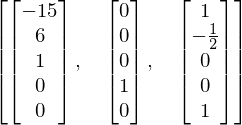

In [116]:
M.nullspace()

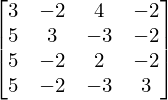

In [117]:
M = Matrix([[3, -2, 4, -2], [5,3,-3,-2], [5,-2,2,-2], [5,-2,-3,3]])
M

In [118]:
M.eigenvals()

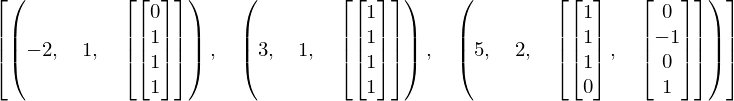

In [119]:
M.eigenvects()

In [120]:
P, D = M.diagonalize()

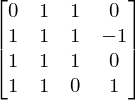

In [121]:
P

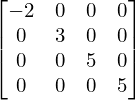

In [122]:
D

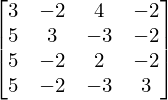

In [123]:
P*D*P**-1

In [124]:
lamda = symbols('lamda')
p = M.charpoly(lamda)
p

In [125]:
factor(p)

Solving Algebraic and Differential Equations
----

In [126]:
solve(x**2 - 1, x)

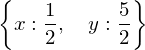

In [127]:
solve((x - y + 2, x + y -3), (x, y))

In [128]:
solve(x**3 - 6*x**2 + 9*x, x)

In [129]:
roots(x**3 - 6*x**2 + 9*x, x)

In [130]:
f, g = symbols('f g', cls=Function)

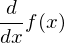

In [131]:
f(x).diff(x)

In [132]:
diffeq = Eq(f(x).diff(x, 2) - 2*f(x).diff(x) + f(x), sin(x))

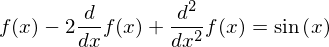

In [133]:
diffeq

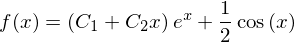

In [134]:
dsolve(diffeq, f(x))

In [135]:
dsolve(f(x).diff(x)*(1 - sin(f(x))), f(x))

In [136]:
a, t = symbols('a t')
f(t).diff(t)
diffeq = Eq(f(t).diff(t), a*t)

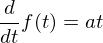

In [137]:
diffeq

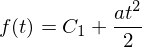

In [138]:
dsolve(diffeq, f(t))

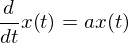

In [139]:
x = symbols('x', cls=Function)
diffeq = Eq(x(t).diff(t), a*x(t))
diffeq

In [140]:
dsolve(diffeq, x(t))

Numerics
----

In [141]:
N(pi, 10)

In [142]:
x = symbols('x')

In [143]:
expr = Integral(sin(x)/(x**2), (x, 1, oo))

In [144]:
expr.evalf()

In [145]:
expr.evalf(maxn=20)

In [146]:
expr.evalf(quad='osc')

In [147]:
expr.evalf(20, quad='osc')

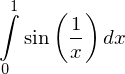

In [148]:
expr = Integral(sin(1/x), (x, 0, 1))
expr

In [149]:
expr.evalf()

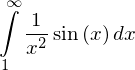

In [150]:
expr = expr.transform(x, 1/x)
expr

In [151]:
expr.evalf(quad='osc')

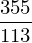

In [152]:
nsimplify(pi, tolerance=0.001)

In [153]:
expr = sin(x)/x

In [154]:
%timeit expr.evalf(subs={x: 3.14})

1000 loops, best of 3: 397 µs per loop


In [155]:
f1 = lambdify(x, expr)
%timeit f1(3.14)

The slowest run took 13.44 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 308 ns per loop


In [156]:
f2 = lambdify(x, expr, 'numpy')
%timeit f2(3.14)

The slowest run took 16.41 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 2.2 µs per loop


In [157]:
%timeit f2(np.linspace(1, 10, 10000))

1000 loops, best of 3: 306 µs per loop


In [158]:
%timeit [f1(x) for x in np.linspace(1, 10, 10000)]

100 loops, best of 3: 5.19 ms per loop


In [159]:
from mpmath import *

In [160]:
f = odefun(lambda x, y: [-y[1], y[0]], 0, [1, 0])
for x in [0, 1, 2.5, 10]:
    nprint(f(x), 15)
    nprint([cos(x), sin(x)], 15)

[1.0, 0.0]
[1.0, 0.0]
[0.54030230586814, 0.841470984807897]
[0.54030230586814, 0.841470984807897]
[-0.801143615546934, 0.598472144103957]
[-0.801143615546934, 0.598472144103957]
[-0.839071529076452, -0.54402111088937]
[-0.839071529076452, -0.54402111088937]


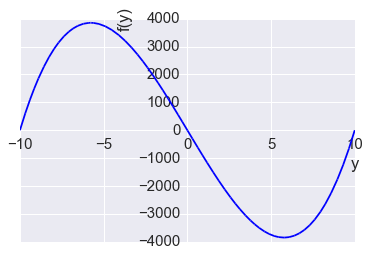

In [161]:
from sympy.plotting import plot
%matplotlib inline

plot(x*y**3 - y*x**3)
pass

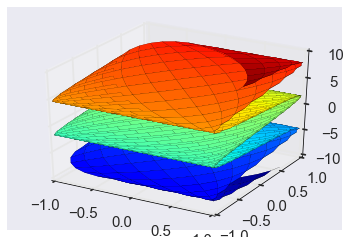

In [162]:
from sympy.plotting import plot3d_parametric_surface
from sympy import sin, cos
u, v = symbols('u v')
plot3d_parametric_surface(cos(u + v), sin(u - v), u-v, (u, -5, 5), (v, -5, 5))
pass

Statistics
----

In [163]:
from sympy.stats import *

In [164]:
k = Symbol("k", positive=True)
theta = Symbol("theta", positive=True)
z = Symbol("z")
X = Gamma("x", k, theta)

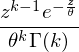

In [165]:
D = density(X)(z)
D

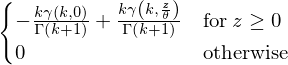

In [166]:
C = cdf(X, meijerg=True)(z)
C

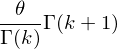

In [167]:
E(X)

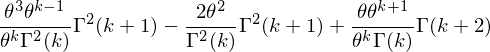

In [168]:
V = variance(X)
V

In [169]:
simplify(V)

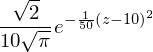

In [170]:
N = Normal('Gaussian', 10, 5)
density(N)(z)

In [171]:
density(N)(3).evalf()

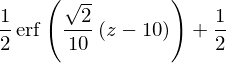

In [172]:
simplify(cdf(N)(z))

In [173]:
P(N > 10)

In [174]:
sample(N)